In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('c:/Users/sudha/Downloads/Restaurant_Reviews.tsv',sep = '\t')

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.shape

(1000, 2)

In [6]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [8]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [9]:
data['char_count']=data['Review'].apply(len)


In [10]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [11]:
data['word_count'] = data['Review'].apply(lambda x :len(str(x).split()))

In [12]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data['sent_count'] = data['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))


In [16]:
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [17]:
data[data['Liked'] == 1]

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1
8,The fries were great too.,1,25,5,1
9,A great touch.,1,14,3,1
...,...,...,...,...,...
899,"Overall, a great experience.",1,28,4,1
901,Their regular toasted bread was equally satisf...,1,97,14,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55,8,2
909,This is my new fav Vegas buffet spot.,1,37,8,1


In [18]:
data[data['Liked'] == 1]['char_count'].mean()

np.float64(55.88)

In [19]:
data[data['Liked'] == 0]['char_count'].mean()

np.float64(60.75)

In [20]:
import re

In [21]:
data['Review'][1]

'Crust is not good.'

In [22]:
review = re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [23]:
review

'Crust is not good '

In [24]:
review = review.lower()

In [25]:
review

'crust is not good '

In [26]:
#review = review.split()

#review = " ".join(review)
#review = review.split()  # Now works

review = review.split()
print(review)

['crust', 'is', 'not', 'good']


In [27]:
review

['crust', 'is', 'not', 'good']

In [28]:
from nltk.corpus import stopwords

In [29]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not') #not is a special word in NLTK, we don't want to remove it

In [30]:
all_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'o

In [31]:
review = [word for word in review if word not in set(all_stopwords)]

In [32]:
review

['crust', 'not', 'good']

#### Stemming

In [33]:
from nltk.stem.porter import PorterStemmer

In [34]:
ps = PorterStemmer()

In [35]:
#Comprehence
review = [ps.stem(word) for word in review]


In [36]:
review = " ".join(review)

In [37]:
review

'crust not good'

In [38]:
import re

custom_stopwords = {'don',
"don't",'ain',
'aren',
"aren't",
'couldn',"couldn't",
'didn',
"didn't",'doesn',
"won't", 'wouldn'
"doesn't",'hadn' ,
"hadn't",
'hasn',
"hasn't",
"haven",'isn',
'haven',
'needn',
"needn't",'shan',
'wasn',
"wasn't",'weren',
"isn't", 'ma',
"shan't", 'no',
"weren't",'won',
'mightn',
'nor',
"mightn't",
'mustn',
"mustn't",
'not',
'shouldn',
"shouldn't",
 "wouldn"}

corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - custom_stopwords

for i in range(len(data)):
    
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review =review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)
    
     


In [39]:
data['processed_text'] = corpus

In [40]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


#### word Cloud pictorial representation

In [41]:
from wordcloud import WordCloud

In [42]:
wc = WordCloud(width=800, height=600, min_font_size=8,background_color='white')

In [43]:
pos = wc.generate(data[data['Liked'] == 1]['processed_text'].str.cat(sep=" "))

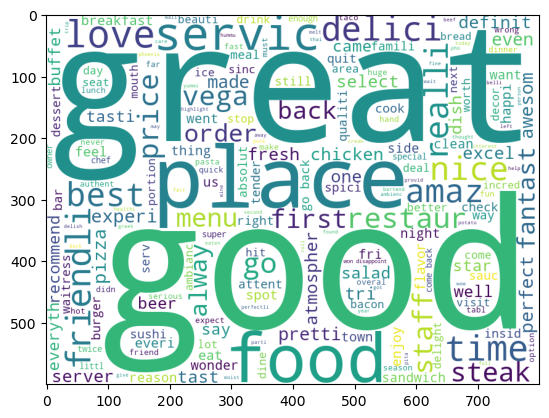

In [44]:
plt.imshow(pos)

In [45]:
negative = wc.generate(data[data['Liked'] == 0]['processed_text'].str.cat(sep=" "))


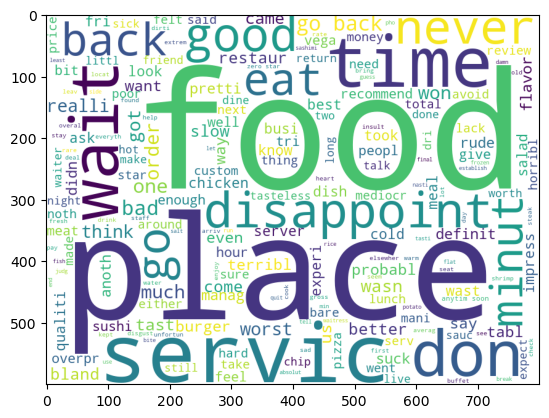

In [46]:
plt.imshow(negative)

In [47]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv = CountVectorizer(max_features=1500)

In [50]:
cv.fit_transform(corpus)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5514 stored elements and shape (1000, 1500)>

In [51]:
x = cv.fit_transform(corpus).toarray()

In [52]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
x.shape

(1000, 1500)

In [54]:
y = data['Liked']

In [55]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test,y_pred)

0.68

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.79

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8

In [ ]:
# Step 1: Import necessary libraries
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Step 2: Example training data
texts = [x_train,y_train]
labels = [x_test]  # 1 = positive, 0 = negative

# Step 3: Train vectorizer
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(texts)

# Step 4: Train model
model = LogisticRegression()
model.fit(x, labels)

# Step 5: Save model and vectorizer
with open('restaurant_review_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
# Step 6: Load model and vectorizer
with open('restaurant_review_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Step 7: Predict user input
user_input = input("Enter your review: ")  # Example: "The food was amazing"
X_input = vectorizer.transform([user_input])
prediction = model.predict(X_input)
proba = model.predict_proba(X_input)

print("Prediction:", "Positive" if prediction[0] == 1 else "Negative")
print("Confidence:", round(proba[0][1], 2))
